Epoch 1/5


c:\Users\haric\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8688 - loss: 0.4748
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9561 - loss: 0.1508
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9672 - loss: 0.1107
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 993us/step - accuracy: 0.9737 - loss: 0.0862
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9792 - loss: 0.0687  
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - accuracy: 0.9669 - loss: 0.1098
Test Accuracy: 0.97


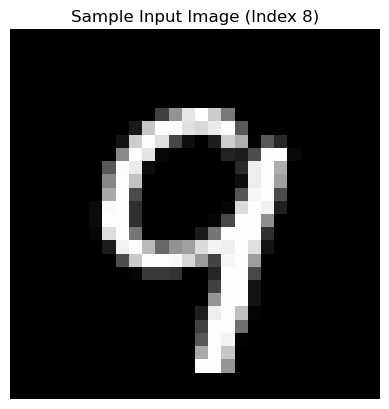

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Digit: 9


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data (scaling pixel values between 0 and 1)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Build a simple neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a 1D vector
    Dense(64, activation='relu'),   # Hidden layer with 64 neurons and ReLU activation
    Dense(10, activation='softmax') # Output layer with 10 neurons (for digits 0-9)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for 5 epochs
model.fit(X_train, y_train, epochs=5)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Display a sample input image from the test set (index 8)
sample_image = X_test[16]
plt.imshow(sample_image, cmap='gray')
plt.title("Sample Input Image (Index 8)")
plt.axis('off')
plt.show()

# Make a prediction on the sample image
sample_input = np.expand_dims(sample_image, axis=0)  # Reshape to match input shape
prediction = model.predict(sample_input)
predicted_digit = np.argmax(prediction)

print(f"Predicted Digit: {predicted_digit}")


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8546 - loss: 0.4979
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9530 - loss: 0.1572
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9663 - loss: 0.1088
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9740 - loss: 0.0850
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9763 - loss: 0.0741
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9741 - loss: 0.0915
Test accuracy: 0.9769999980926514
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


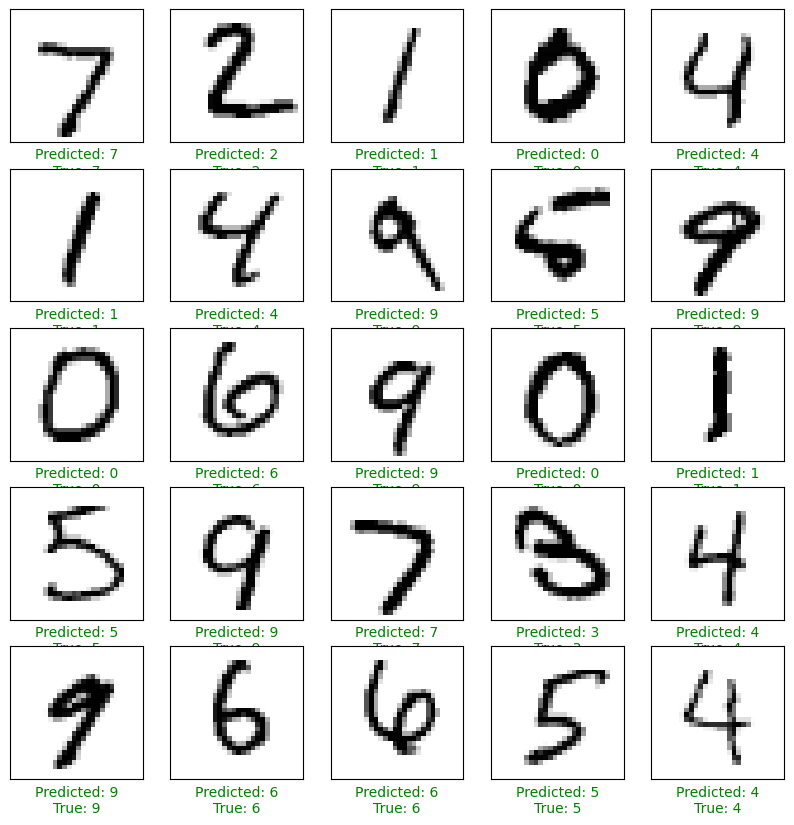

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images
train_images, test_images = train_images / 255.0, test_images / 255.0

# Build the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),  # Dropout layer to reduce overfitting
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

# Make predictions
predictions = model.predict(test_images)

# Plot the first 25 test images with their predicted and true labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)

    predicted_label = predictions[i].argmax()
    true_label = test_labels[i]

    # Set color based on whether the prediction is correct
    color = 'green' if predicted_label == true_label else 'red'

    plt.xlabel(f"Predicted: {predicted_label}\nTrue: {true_label}", color=color)

plt.show()
